In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import seaborn as sns

In [4]:
def fitness(array,r_base,r_mutant):
    '''Updates the fitness of cells.
    param:: array: records the type of every cell (0-basic or 1-mutant)
    return:: r
    '''
    type0=array==0
    type1=array==1
    r=type0*r_base+type1*r_mutant
    return r

def index_rep(N,r,index_d):
    '''Determines the index of the cell which will reproduce.
    param:: N: number of cells
    param:: r: array that records the fitness of every cell
    param:: index_d: index of the cell which recently died
    return: k
    '''
    if index_d==0:
        k=1
    elif index_d==N-1:
        k=N-2
    else:
        if np.random.uniform()<r[index_d-1]/(r[index_d-1]+r[index_d+1]):
            k=index_d-1
        else:
            k=index_d+1
    return k

def reproduce(N,array,r_base,r_mutant):
    '''Updates the array which records the type of every cell (0-basic or 1-mutant) after cell death and reproduction.
    param:: N: number of cells
    param:: r: array that records the fitness of every cell
    param:: r_base: fitness of a basic cell
    param:: r_mutant: fitness of a mutant cell
    '''
    r=fitness(array,r_base,r_mutant)
    index_d = np.random.choice(range(N),size=1)[0]
    array[index_d]=array[index_rep(N,r,index_d)]

def determine_type():
    '''Determines which cells are basic and which are mutants.
    return: type0, type1
    '''
    type0 = np.where(array==0)[0]
    type1 = np.where(array==1)[0]
    return type0, type1

def simulate(N,array,r_base,r_mutant,mutant_index):
    '''Perform full simulation given specific parameter values.
    param:: N: number of cells
    param:: r: array that records the fitness of every cell
    param:: r_base: fitness of a basic cell
    param:: r_mutant: fitness of a mutant cell
    param:: mutant_idex: index of the initial mutant cell
     '''
    array[mutant_index]=1
    norm=np.linalg.norm(array,1)
    stop_time=0
    while (norm>0) & (norm<N):
        reproduce(N,array,r_base,r_mutant)
        norm=np.linalg.norm(array,1)
    return norm

In [5]:
'''Sample animation of the 1-Dimensional Moran model of cancer.'''
N=10                                                #number of cells
mutant_index=np.random.choice(range(N),size=1)[0]   #randomize mutant cell position
r_base=1                                            #fitness of a basic cell             
r_mutant=2                                          #fitness of a mutant cell
array=np.zeros(N)
array[mutant_index]=1

f = plt.figure(figsize=(5,2))
ax = plt.subplot(111, xlim=(0,N+1), ylim=(-1,1))
ax.set_frame_on(False)
ax.tick_params(left=False)
ax.set_yticklabels([])
ax.set_xticks(np.arange(1,N+1))
basic = ax.scatter([],[],c='b',s=100,label='Basic Cell')
mutant = ax.scatter([],[],c='r',s=100,label='Mutant Cell')
plt.legend()

def init():
    type0,type1=determine_type()
    basic.set_offsets(np.transpose([1+type0,np.zeros(len(type0))]))
    mutant.set_offsets(np.transpose([1+type1,np.zeros(len(type1))]))
    return basic,

def animate(i):
    reproduce(N,array,r_base,r_mutant)
    type0,type1=determine_type()
    basic.set_offsets(np.transpose([1+type0,np.zeros(len(type0))]))
    mutant.set_offsets(np.transpose([1+type1,np.zeros(len(type1))]))
    return basic,

anim = animation.FuncAnimation(f, animate, init_func=init, frames=100,blit=True)
html=HTML(anim.to_jshtml())
display(html)
plt.close()

In [6]:
N=10                                                #number of cells
mutant_index=np.random.choice(range(N),size=1)[0]   #randomize mutant cell position
r_base=1                                            #fitness of a basic cell             
r_mutant=2                                          #fitness of a mutant cell
array=np.zeros(N)
array[mutant_index]=1

for i in range(100):
    reproduce(N,array,r_base,r_mutant)
    print(array)

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
[0. 0. 1

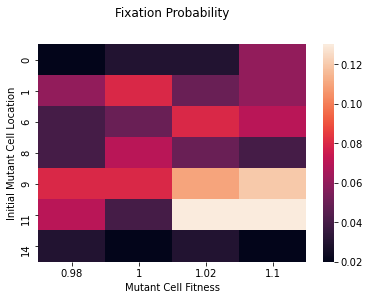

In [7]:
'''Here we look at the numerical fixation probability with respect to different values of the mutant cell fitness,
r_mutant, and different initial location of the first mutant cell.'''

N=15
mutant_index=np.sort(np.append([0,N-1],np.random.choice(np.arange(1,N-1),size=5,replace=False)[0:]))
r_base=1
r_mutant=[0.98,1,1.02,1.1]
repeats=100
prob=np.zeros([len(mutant_index),len(r_mutant)])
for i in range(len(mutant_index)):
    for j in range(len(r_mutant)):
        fixation_count=0
        for k in range(repeats):
            array=np.zeros(N)
            norm=simulate(N,array,r_base,r_mutant[j],mutant_index[i])
            if norm==N:
                fixation_count+=1
        prob[i,j]=fixation_count/repeats
f=plt.figure()
ax = plt.subplot(111)
sns.heatmap(prob)
ax.set_xticklabels(r_mutant)
ax.set_yticklabels(mutant_index)
ax.set_xlabel('Mutant Cell Fitness')
ax.set_ylabel('Initial Mutant Cell Location')
plt.title('Fixation Probability',y=1.1)
plt.show()

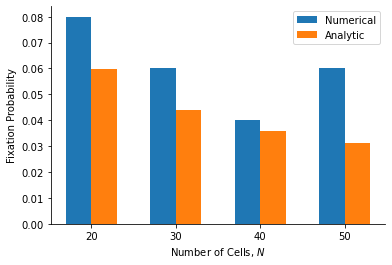

In [8]:
'''Here we look at the numerical fixation probability with respect to different number of cells, N, given that the
initial mutant cell is at the midpoint, for some fixed mutant cell fitness, r_mutant.'''
N=np.array([20,30,40,50])
mutant_index=(np.round(N/2)-1).astype(int)
r_base=1
r_mutant=1.02
repeats=100
prob=np.zeros(len(N)) #Numerical fixation probability
rho=np.zeros(len(N))  #Analytic fixation probability for a non-spatial model
for i in range(len(N)):
    fixation_count=0
    for k in range(repeats):
        array=np.zeros(N[i])
        norm=simulate(N[i],array,r_base,r_mutant,mutant_index[i])
        if norm==N[i]:
            fixation_count+=1
    prob[i]=fixation_count/repeats
    rho[i]=(1-1/r_mutant)/(1-(1/r_mutant**N[i]))
width=3
plt.bar(N-width/2,prob,width,label='Numerical')
plt.bar(N+width/2,rho,width,label='Analytic')
plt.xticks(N)
plt.xlabel(r'Number of Cells, $N$')
plt.ylabel('Fixation Probability')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

The fixation (invasion) probability in a stochastic non-spatial model is given by 
$$\rho(r)=\dfrac{1-1/r}{1-1/r^N}$$
where r is the mutant fitness

In [10]:
def reproduce_2(N,array,r_base,r_mutant):
    '''Updates the array which records the type of every cell (0-basic or 1-mutant) after reproduction, given the 
    new reproduction scheme.
    param:: N: number of cells
    param:: r: array that records the fitness of every cell
    param:: r_base: fitness of a basic cell
    param:: r_mutant: fitness of a mutant cell
    '''
    r=fitness(array,r_base,r_mutant)
    index_r = np.random.choice(range(len(r)),size=1,p=r/np.sum(r))[0] 
    dummy = array
    if (index_r>0) & (index_r<N-1):
        if index_r<=center:
            array[index_r-1] = array[index_r]
            if index_r>1:
                array[0:index_r-2] = dummy[1:index_r-1]
        else:
            array[index_r+1] = array[index_r]
            if index_r<N-2:
                array[index_r+2:] = dummy[index_r+1:N-1]

In [11]:
'''Sample animation of the variation of the 1-Dimensional Moran model of cancer.'''
N=20                                                #number of cells
mutant_index=np.random.choice(range(N),size=1)[0]   #randomize mutant cell position
r_base=1                                            #fitness of a basic cell             
r_mutant=2                                          #fitness of a mutant cell
array=np.zeros(N)
array[mutant_index]=1
center=np.round(N/2).astype(int)

f = plt.figure(figsize=(10,2))
ax = plt.subplot(111, xlim=(0,N+1), ylim=(-1,1))
ax.set_frame_on(False)
ax.tick_params(left=False)
ax.set_yticklabels([])
ax.set_xticks(np.arange(1,N+1))
basic = ax.scatter([],[],c='b',s=100,label='Basic Cell')
mutant = ax.scatter([],[],c='r',s=100,label='Mutant Cell')
plt.legend()

def init():
    type0,type1=determine_type()
    basic.set_offsets(np.transpose([1+type0,np.zeros(len(type0))]))
    mutant.set_offsets(np.transpose([1+type1,np.zeros(len(type1))]))
    return basic,

def animate(i):
    reproduce_2(N,array,r_base,r_mutant)
    type0,type1=determine_type()
    basic.set_offsets(np.transpose([1+type0,np.zeros(len(type0))]))
    mutant.set_offsets(np.transpose([1+type1,np.zeros(len(type1))]))
    return basic,

anim = animation.FuncAnimation(f, animate, init_func=init, frames=100,blit=True)
html=HTML(anim.to_jshtml())
display(html)
plt.close()

It is clear that with the new scheme, a mutant cell will never be able to invade the system, and that the fixation 
probability is always zero for any initial mutant cell position. At best, there would be half of the population being mutant, which happens if the initial mutant position is at most 1 unit away from the center.